<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4 -  West Nile Virus Prediction

# Part 4 - Cost-Benefit Analysis

## Contents:
- [Cost-Benefit Analysis](#Cost-Benefit-Analysis)
- [Conclusions](#Conclusions)
- [Recommendations](#Recommendations)
- [Future Steps](#Future-Steps)

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Cost-Benefit Analysis

As part of the Chicago Department of Public Health (CDPH) to tackle the West Nile Virus (WNV), one of the efforts include spraying pesticides to reduce the population of mosquitioes to reduce the population of mosquitoes carrying WNV. As per our EDA, we find that the efforts for spraying pesticides were not necessarily targeted to high risk areas, possibly leading to cost-savings if our model is able to provide a prediction of high risk areas.

The costs analysed here will include the cost of the spraying of pesticides, while the benefits will include the cost avoidance of medical and productivity costs from preventing cases of WNV through the spraying of pesticides in Chicago.

### Estimated cost of spraying

The CDPH is continuing its efforts to protect residents against West Nile virus through the spraying of pesticide. Zenivex E4, approved for use by the U.S. Environmental Protection Agency, will be widely applied to control mosquitoes in outdoor residential and recreational areas from July to September. The pesticide is not harmful to humans or pets, and will be routinely sprayed in residential areas in Chicago ([*source*](https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_communities/news/2020/august/city-to-spray-insecticide-thursday-to-kill-mosquitoes.html), [*source*](https://www.chicago.gov/content/dam/city/depts/cdph/Mosquito-Borne-Diseases/Zenivex.pdf)). 

Zenivex E4 is a 4% solution of etofenprox that does not contain piperonyl butoxide, and contains synthetic pyrethroids, which emulate naturally occurring insecticides known as pyrethrums, found in chrysanthemum flowers. It kills mosquitoes effectively yet degrades quickly under sunlight and/or presence of microorganisms ([*source*](https://www.cmmcp.org/pesticide-information/pages/zenivex-e4-etofenprox)).

The price of Zenivex E4 (as of 2015), is USD0.92 per acre ([*source*](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwiQwfeRp570AhUGdysKHZfyD8AQFnoECA4QAQ&url=http%3A%2F%2Fwww.centralmosquitocontrol.com%2F-%2Fmedia%2Ffiles%2Fcentralmosquitocontrol-na%2Fus%2Fresources-lit%2520files%2F2015%2520zenivex%2520pricing%2520brochure.pdf&usg=AOvVaw0iCC0qwAeuZ9hbnMN50CQ9)) and the amount required is 1.5 fluid ounces (3 tablespoons) per acre ([*source*](https://www.chicago.gov/content/dam/city/depts/cdph/Mosquito-Borne-Diseases/Zenivex.pdf)). 

With the area of Chicago being 149,800 acres, the total amount of pesticide required to spray the entire city will be calculated below:




In [2]:
# Calculate cost of spraying the entire area of Chicago once
# Estimate inflation rate to be 2% per annum over the last 6 years
inflation = 0.02 
spray_cost = 0.92 # per acre
area = 149800 

total_cost = round((spray_cost*area)*(1+inflation)**6)
print(f"The total cost for spraying the entire area of Chicago once is ${total_cost} in 2021.")

The total cost for spraying the entire area of Chicago once is $155203 in 2021.


Since mosquito season in Chicago starts from week 26 (end-June) and ends in week 40 (start of October), and Zenivex has a half-life of 1.5 days in water and 4.4 days in soil ([*source*](https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_communities/news/2020/august/city-to-spray-insecticide-thursday-to-kill-mosquitoes.html)), since it takes 4-5 half lives for the pesticide to be fully cleared (we will be targetting larvaes that lives in water, hence prioritizing water half-life), making it ideal for weekly sprays. As mosquito season stretches across 14 weeks, we will take the number of sprays for the season to be 14 rounds of spray.

In [3]:
# Calculate cost of having 14 rounds of spray
total_cost_14 = total_cost*14
print(f"The total cost for spraying the entire area of Chicago 14 times is ${total_cost_14} in 2021.")

The total cost for spraying the entire area of Chicago 14 times is $2172842 in 2021.


### Medical costs

Severity of disease range from symptoms that are self-limiting similar to that of the common cold, to severe form of disease which is neuroinvasive in nature (e.g. West Nile encephalitis, meningitis or poliomyelitis) ([*source*](https://www.who.int/news-room/fact-sheets/detail/west-nile-virus)).

A study was done in California in 2005, estimating the total medical costs incurred by each patient ([*source*](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3322011/#R5)). In this study, 163 cases were reported, with 28.2% of cases required inpatient or outpatient treatment, while 71.8% were mild cases requiring a doctor's visit or diagnostic tests. On average, a patient with severe disease spent USD39,460 for inpatient and outpatient treatment, and a patient with mild disease spent USD302 on a doctor's visit and diagnostic tests ([Table 2 & 4](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3322011/#R5)).



In [4]:
# Calculate weighted average for medical treatments
wnv_severe = 0.282 # % of patients with severe WNV
wnv_mild = 0.718 # % of patients with mild WNV
cost_severe = 39460
cost_mild = 302


weighted_cost = round((wnv_severe*cost_severe+wnv_mild*cost_mild)*(1+inflation)**16)
print(f"The weighted medical cost for each patient is ${weighted_cost} in 2021.")

The weighted medical cost for each patient is $15574 in 2021.


### Productivity costs

Productivity loss for patients with severe disease was USD9150 on average and  USD 790 for patients with mild disease ([Table 3 & 4](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3322011/#R5))). 

In [5]:
# Calculate weight average of productivity costs
pro_cost_mild = 790
pro_cost_severe = 9150

pro_weighted_cost = round((wnv_severe*pro_cost_severe+wnv_mild*pro_cost_mild)*(1+inflation)**16)
print(f"The weighted productivity cost for each patient is ${pro_weighted_cost} in 2021.")

The weighted productivity cost for each patient is $4321 in 2021.


### Total cost per patient
Calculating the total cost of a WNV patient would include summing up the both weighted medical and productivity costs.

In [6]:
# Calculate total medical + productivity cost per patient
cost_wnv_present = weighted_cost + pro_weighted_cost
print(f"The weighted cost for each patient is ${cost_wnv_present} in 2021.")

The weighted cost for each patient is $19895 in 2021.


### Analysis

Currently, the cost-benefit ratio is quite high. The blue line in the chart below represents the cost savings from reduction in the number of WNV cases. The horizontal red dotted line represents the cost of spraying the whole of Chicago every week for 3 months. Spray efforts would have to reduce number of human cases by 100 in order to justify the cost, but the average number of cases per year have generally been below 100. Even in 2013, which had the biggest outbreak in our dataset, there were only 66 recorded human cases ([source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7241786/#sec009title)).

As such, spraying the whole of Chicago on a weekly basis is evidently a costly and inefficient endeavour. A more effective approach would be to target spraying at areas that have a high predicted probability of WNV outbreak.

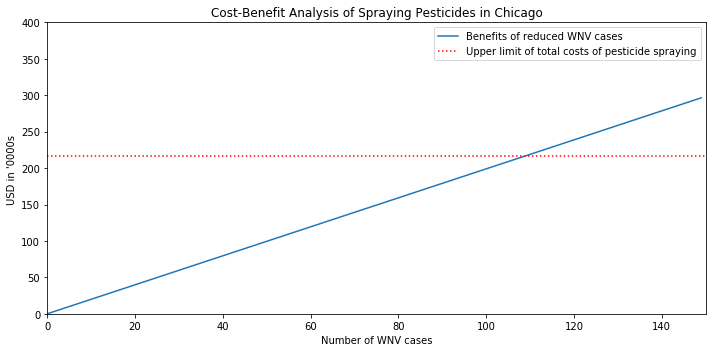

In [7]:
plt.figure(figsize=(10,5))

plt.title('Cost-Benefit Analysis of Spraying Pesticides in Chicago')
plt.xlabel('Number of WNV cases')
plt.ylabel("USD in '0000s ")

plt.plot(np.arange(0, 150),
         np.arange(0, 150) * cost_wnv_present/10000, label = 'Benefits of reduced WNV cases')

# create horizontal line on the plot to illustrate the maximum cost of pesticide spraying
plt.axhline(y=total_cost_14/10000, color='r', linestyle=':', 
            label = 'Upper limit of total costs of pesticide spraying')


plt.ylim(0,400)
plt.xlim(0,150)
plt.legend()
plt.tight_layout()
plt.show();

## Conclusions
1. Presence of WNV is affected by time of year, with mosquito season peaking in July to September.
2. The three biggest weather indicators that affected the mosquito outbreak were temperature, humidity, and precipitation:
  - The ideal temperature range for mosquito breeding is 50 - 80° F
  - The ideal humidity range is a relative humidity of 64 - 83
  - Rain generally leads to less mosquitos in the short term, likely due to disturbance of stagnant water bodies. However, there is likely to be a spike in mosquitos after the rain due to creation of new stagnant water bodies.
3. Previous spray efforts have been poorly targeted. Spraying in 2013 took place within range of less than 20% of infected areas. Our EDA suggests that past spray campaigns have had limited impact on containing the WNV outbreak.




## Recommendations
1. **Monitoring should begin towards the beginning of July and last until the end of September.** This should involve tracking weather changes as well as laying traps to monitor presence of WNV in the mosquito population.
2. **Weather forecasts should be used to direct spraying efforts,** with special attention being paid to periods of warm weather following recent rainfall.
3. **Our prediction model should be used to guide future spray campaigns.** With a recall of around 75%, it presents a 55% improvement on current spray efforts, which only correctly targeted 20% of outbreak areas.


These recommendations can be integrated by exporting our Logistic Regression model to a frontend application for scientists and biologists to use when collecting mosquito samples. By keying in the relevant data needed as input to the model, we will be able to gauge the probability of WNV being present in the trap.

If WNV is present in the sample, this indicates that the particular street surrounding the trap may be a hotspot. Pesticides should thus be deployed to exterminate carriers that may be potential zoonotic vectors for the disease to spread. This achieves our objective of increasing efficiency in West Nile Virus detection and thus reducing resource wastage.

## Future Steps
- **More accurate data on weather should be gathered to input for model training and prediction.** Currently, weather data is mapped to traps depending on whether traps are nearer to station 1 or station 2. If more localized weather data can be obtained, this would greatly improve model fit and prediction.

- **Measure the efficacy of other methods of mosquito control that have been used elsewhere,** such as using larvicide, or releasing genetically-modified mosquitos. A holistic approach to mosquito control covers four key aspects ([source](https://www.epa.gov/mosquitocontrol/success-mosquito-control-integrated-approach)): 
  1. ***Removing breeding habitats*** - This involves treatment or elimination of stagnant water sources.
  2. ***Constructing structural barriers*** - Construction of screens in homes may help reduce bites.
  3. ***Controlling mosquitos at the larval stage*** - This approach maximizes the effectiveness of pesticide application and minimizes its use. One method involves use of larvicide while another method of control involves releasing genetically-modified male mosquitos that pass on genes that kill female offspring, as only female mosquitos bite and spread diseases.
  4. ***Controlling adult mosquitos*** - Using an EPA-registered pesticide is one of the fastest and best options to combat an outbreak of mosquito-borne disease being transmitted by adult mosquitoes. These pesticides are known as adulticides. Zenivex E4, which is currently used, is an adulticide.
